## Import Libraries

In [98]:
#libraries
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
from numpy import random
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sc
from ipywidgets import interactive
import ipywidgets as widgets
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import boxcox
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [99]:
# Function for reading the data:
def read_customer_data():
    return pd.read_csv("../Downloads/Data_Marketing_Customer_Analysis_Round2.csv")

In [100]:
df = read_customer_data()

In [101]:
list(df)

['Unnamed: 0',
 'Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size',
 'Vehicle Type']

### We define a series of functions for our data cleaning pipe:

In [102]:
#Function for standardizing column names:
def standardize(df):
    new_columns = df.columns.str.lower().str.replace(" ", "_")
    df.columns = new_columns
    return df

In [103]:
#Function for dropping customer and unnamed:_0 columns
def drop_2cols(df):
    df.drop(columns=["unnamed:_0", "customer"], inplace=True)
    return df

In [104]:
#Drop duplicates and reset index
def dd(df):
    df = df.drop_duplicates().reset_index()
    df.drop(columns=["index"], inplace=True)
    return df

In [105]:
#Replacing null values
def fill_null(df):
    df["number_of_open_complaints"] = df["number_of_open_complaints"].fillna(value=0)
    df["vehicle_type"] = df["vehicle_type"].fillna(value="M")
    mean_months = round(df["months_since_last_claim"].mean())
    df["months_since_last_claim"] = df["months_since_last_claim"].fillna(value=mean_months)
    mean_income = round(df["income"].mean())
    df["income"] = df["income"].fillna(value=mean_income)
    return df

In [106]:
#Creating a months column for the effective_to_date column only
def month_creation(df):
    df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce')
    df["month_effective_to_date"]=list(map(lambda date:date.strftime(format="%B"),df["effective_to_date"]))
    return(df)

### Running the pipe

In [107]:
df = read_customer_data().pipe(standardize).pipe(drop_2cols).pipe(dd).pipe(fill_null).pipe(month_creation)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10776 entries, 0 to 10775
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          10163 non-null  object        
 1   customer_lifetime_value        10776 non-null  float64       
 2   response                       10163 non-null  object        
 3   coverage                       10776 non-null  object        
 4   education                      10776 non-null  object        
 5   effective_to_date              10776 non-null  datetime64[ns]
 6   employmentstatus               10776 non-null  object        
 7   gender                         10776 non-null  object        
 8   income                         10776 non-null  int64         
 9   location_code                  10776 non-null  object        
 10  marital_status                 10776 non-null  object        
 11  monthly_premium

In [108]:
df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month_effective_to_date
0,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,February
1,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,January
2,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
3,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
4,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10771,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,Suburban,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,January
10772,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,Urban,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,January
10773,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,Rural,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,M,February
10774,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,Urban,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,February


In [109]:
df["vehicle_type"].value_counts()

M    5416
A    5360
Name: vehicle_type, dtype: int64

<AxesSubplot:>

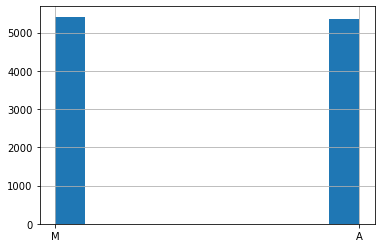

In [110]:
df["vehicle_type"].hist()

### Findings: We can see that the response rate by income is quite similar but for the ones that have low incomes. There you clearly see that a lot of low income people dont response whereas only very little do respond up to the level of 20k.

## Activity 5
### Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)¶

In [111]:
# Identify all the categorical columns 
[col for col in df.columns if not col in df._get_numeric_data().columns]

['state',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type',
 'month_effective_to_date']

In [112]:
# save a new subset -> numerical columns as the new DF
numerical = df._get_numeric_data()

In [113]:
# save a new subset -> cathegorical columns as the new DF
categorical=[i for i in df.columns if df.dtypes[i]=='object']
categorical

['state',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type',
 'month_effective_to_date']

### Plot the response rate by income to check for outliers

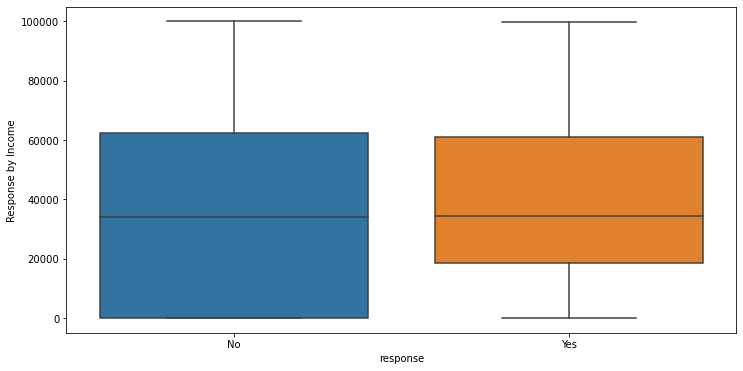

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(y='income' , x='response', data=df)
plt.ylabel('Response by Income')
plt.show()

- Findings: We can see that the response rate by income is quite similar but for the ones that have low incomes. There you clearly see that a lot of low income people dont response whereas only very little do respond up to the level of 20k.

## Now we will try to check the normality of the numerical variables visually
- Use seaborn library to construct distribution plots for the numerical variables
- Use Matplotlib to construct histograms
- Do the distributions for different numerical variables look like a normal distribution

In [114]:
# Identify all the numerical columns 
[col for col in df.columns if col in df._get_numeric_data().columns]

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

In [115]:
numerical["customer_lifetime_value"].value_counts()

7507.455372     11
5504.139033     11
13727.799720    10
5181.620895     10
4250.282624     10
                ..
8485.385641      1
8400.788878      1
5525.836623      1
3768.086327      1
6051.799036      1
Name: customer_lifetime_value, Length: 8041, dtype: int64

In [21]:
numerical.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000
mean,8016.710885,37543.735152,93.200260,15.138456,48.120638,0.361730,2.979306,434.759809
std,6885.053012,30397.579910,34.408721,9.782011,27.928243,0.888701,2.398228,292.452845
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,270.290316
50%,5774.709107,33837.000000,83.000000,15.000000,48.000000,0.000000,2.000000,383.403043
75%,8991.339269,62329.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


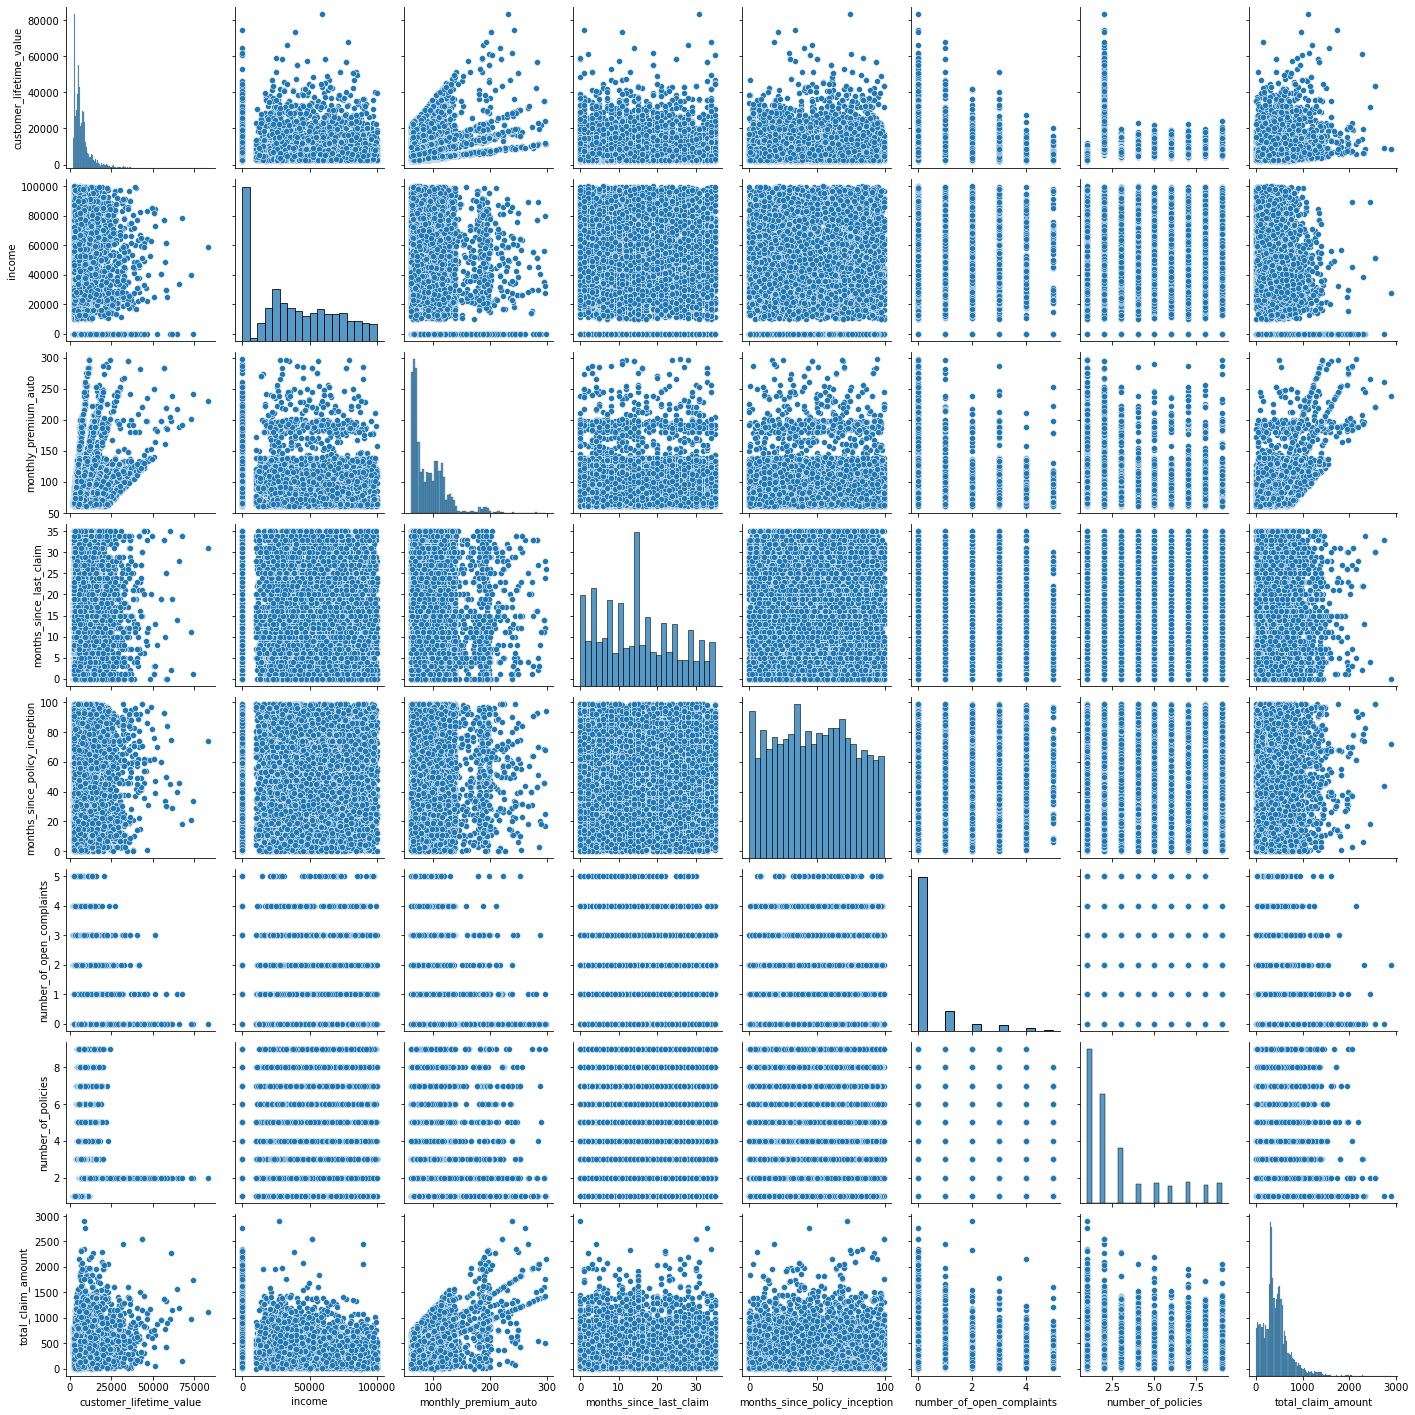

In [22]:
sns.pairplot(df)
plt.show()

- Finding: We see that that total_claim_amount and monthly_premium_auto could have a correlation somehow.

### Normalization on the features

C:\Users\ronal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='monthly_premium_auto', ylabel='Density'>

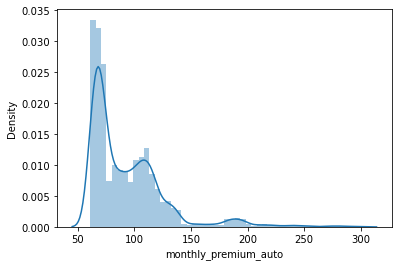

In [116]:
# Use seaborn library to construct distribution plots for the numerical variables
# -> probablity density function

sns.distplot(numerical["monthly_premium_auto"], hist=True)

# FINDING: Looks like a LogNromal distribution and should be changed to a more normal distribution

In [117]:
# Using Box-Cox Normalization method without lambda, seamingly calculating the optimal lambda

from scipy.stats import boxcox

monthly,l=boxcox(numerical['monthly_premium_auto'])
# the l after monthly is the optimal lambda calculated

In [118]:
monthly,l

(array([0.6830305 , 0.683145  , 0.68389994, ..., 0.6844251 , 0.68430026,
        0.68391179]),
 -1.4604478780820638)

<AxesSubplot:ylabel='Count'>

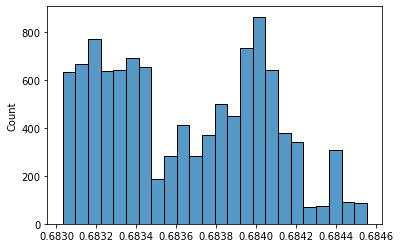

In [122]:
sns.histplot(monthly)

In [123]:
# Using Box-Cox Normalization method with lamda=0.02

from scipy.stats import boxcox

monthly2=boxcox(numerical['monthly_premium_auto'],lmbda=0.02)

<AxesSubplot:ylabel='Count'>

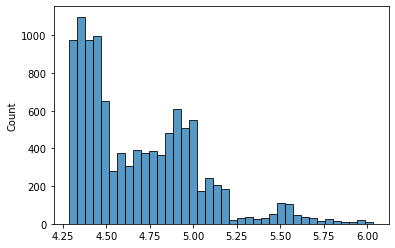

In [124]:
sns.histplot(monthly2)

In [125]:
numerical["customer_lifetime_value"].describe()

count    10776.000000
mean      8016.710885
std       6885.053012
min       1898.007675
25%       4014.453113
50%       5774.709107
75%       8991.339269
max      83325.381190
Name: customer_lifetime_value, dtype: float64

In [126]:
# Power Transformer -> normalize the data between -2 and 2

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
customer_lifetime_value_normalized = pt.fit_transform(numerical["monthly_premium_auto"].to_numpy().reshape(-1,1))

<AxesSubplot:ylabel='Count'>

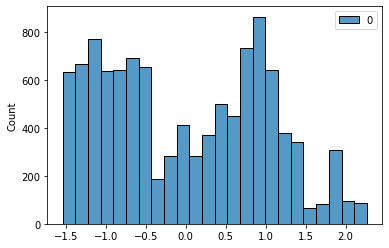

In [127]:
sns.histplot(customer_lifetime_value_normalized)

In [129]:
# Quantile Transformer

from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer()

monthly3=qt.fit_transform(numerical['monthly_premium_auto'].to_numpy().reshape(-1,1))

<AxesSubplot:ylabel='Count'>

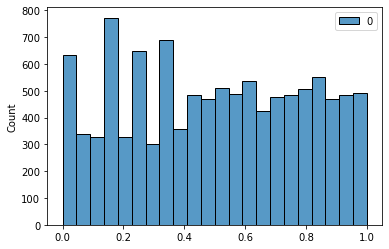

In [130]:
sns.histplot(monthly3)

C:\Users\ronal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Density'>

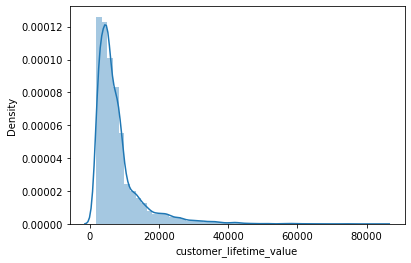

In [131]:
sns.distplot(numerical["customer_lifetime_value"], hist=True)

In [132]:
# Using Box-Cox Normalization method without lambda, seamingly calculating the optimal lambda

from scipy.stats import boxcox

monthly12,l=boxcox(numerical['customer_lifetime_value'])
# the l after monthly is the optimal lambda calculated

<AxesSubplot:ylabel='Count'>

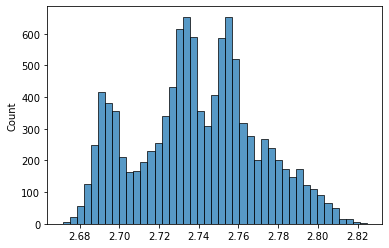

In [133]:
sns.histplot(monthly12)

<AxesSubplot:xlabel='customer_lifetime_value', ylabel='total_claim_amount'>

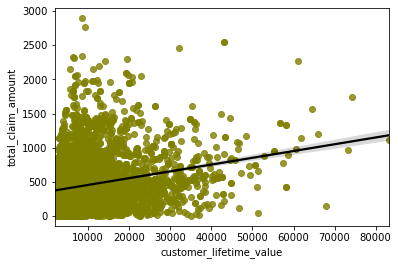

In [134]:
# PLOT FITTED LINE Between two (best) correlating variables/features 

sns.regplot(x='customer_lifetime_value',y='total_claim_amount', data=numerical, scatter_kws={"color": "olive"}, line_kws={"color": "black"})

C:\Users\ronal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='income', ylabel='Density'>

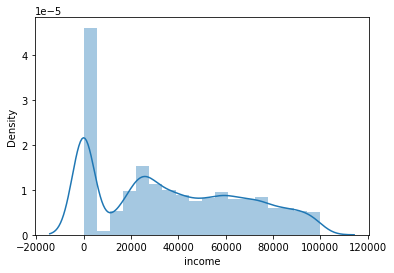

In [135]:
sns.distplot(numerical["income"], hist=True)

C:\Users\ronal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

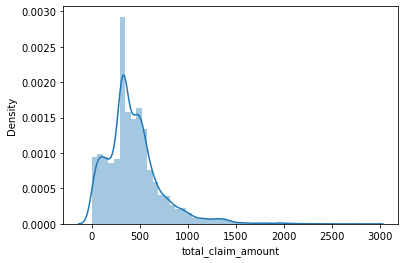

In [136]:
sns.distplot(numerical["total_claim_amount"], hist=True)

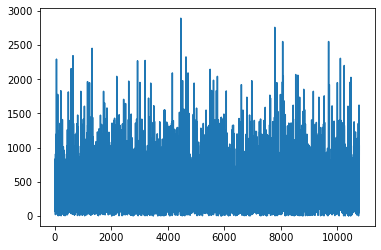

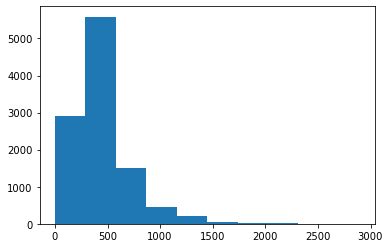

In [26]:
from matplotlib import pyplot
pyplot.plot(numerical["total_claim_amount"])
pyplot.show()

# histogram
pyplot.hist(numerical["total_claim_amount"])
pyplot.show()

- It seems that the series are not normally distributed

## Normalizing data

In [138]:
# Max absolute 
# copy the data
numerical_max_scaled = numerical.copy()
  
# apply normalization techniques
for column in numerical_max_scaled.columns:
    numerical_max_scaled[column] = numerical_max_scaled[column]  / numerical_max_scaled[column].abs().max()
      
# view normalized data
display(numerical_max_scaled)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.057716,0.480381,0.204698,0.200000,0.525253,0.0,1.000000,0.101201
1,0.026745,0.000000,0.214765,0.085714,0.262626,0.0,0.111111,0.257471
2,0.179392,0.221432,0.335570,0.971429,0.313131,0.0,0.222222,0.165904
3,0.268015,0.490873,0.325503,0.285714,0.030303,0.0,0.222222,0.167291
4,0.108311,0.236795,0.392617,0.428571,0.313131,0.0,0.777778,0.244683
...,...,...,...,...,...,...,...,...
10771,0.186778,0.000000,0.848993,0.428571,0.404040,0.0,0.777778,0.419737
10772,0.063119,0.611576,0.218121,0.200000,0.686869,0.0,0.666667,0.094364
10773,0.286747,0.398446,0.674497,0.314286,0.636364,0.0,0.222222,0.131792
10774,0.143677,0.642072,0.530201,0.000000,0.272727,0.8,0.666667,0.213701


In [139]:
# Min absolute 
# copy the data
numerical_min_max_scaled = numerical.copy()
  
# apply normalization techniques
for column in numerical_min_max_scaled.columns:
    numerical_min_max_scaled[column] = (numerical_min_max_scaled[column] - numerical_min_max_scaled[column].min()) / (numerical_min_max_scaled[column].max() - numerical_min_max_scaled[column].min())    
  
# view normalized data
numerical_min_max_scaled

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,0.101171
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.257445
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,0.165875
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.167263
4,0.087527,0.236795,0.236287,0.428571,0.313131,0.0,0.750,0.244657
...,...,...,...,...,...,...,...,...
10771,0.167823,0.000000,0.810127,0.428571,0.404040,0.0,0.750,0.419717
10772,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625,0.094333
10773,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125,0.131763
10774,0.123717,0.642072,0.409283,0.000000,0.272727,0.8,0.625,0.213674


C:\Users\ronal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='income', ylabel='Density'>

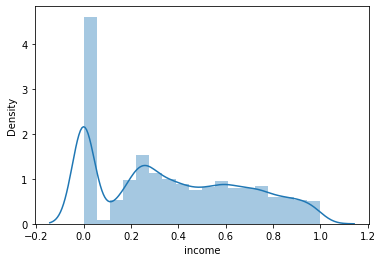

In [140]:
sns.distplot(numerical_min_max_scaled["income"], hist=True)

In [141]:
# -> HUGE BENEFIT TO TAKE MULTIPLE NUMERICAL independent VARIABLES INTO A MODEL. They are same scaled!
# copy the data
numerical_z_scaled = numerical.copy()
  
# apply normalization techniques
for column in numerical_z_scaled.columns:
    numerical_z_scaled[column] = (numerical_z_scaled[column] -
                           numerical_z_scaled[column].mean()) / numerical_z_scaled[column].std()    
# view normalized data  
display(numerical_z_scaled)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,-0.465863,0.344937,-0.935817,-0.831982,0.138905,-0.407032,2.510476,-0.485411
1,-0.840689,-1.235090,-0.848630,-1.240896,-0.792053,-0.407032,-0.825320,1.060563
2,1.006703,-0.506775,0.197617,1.928187,-0.613022,-0.407032,-0.408346,0.154692
3,2.079247,0.379447,0.110430,-0.525296,-1.615592,-0.407032,-0.408346,0.168416
4,0.146456,-0.456245,0.691678,-0.014154,-0.613022,-0.407032,1.676527,0.934051
...,...,...,...,...,...,...,...,...
10771,1.096093,-1.235090,4.644164,-0.014154,-0.290768,-0.407032,1.676527,2.665866
10772,-0.400471,0.776452,-0.819567,-0.831982,0.711801,-0.407032,1.259553,-0.553049
10773,2.305951,0.075442,3.132919,-0.423068,0.532771,-0.407032,-0.408346,-0.182774
10774,0.574472,0.876756,1.883236,-1.547581,-0.756247,4.093920,1.259553,0.627551


### For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

## Checking Multicorrelinilaty

                               customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.027585   
income                                        0.027585  1.000000   
monthly_premium_auto                          0.404830 -0.009928   
months_since_last_claim                       0.014403 -0.023715   
months_since_policy_inception                 0.017021 -0.005932   
number_of_open_complaints                    -0.030705  0.008962   
number_of_policies                            0.016976 -0.010402   
total_claim_amount                            0.233872 -0.354916   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.404830                 0.014403   
income                                    -0.009928                -0.023715   
monthly_premium_auto                       1.000000                 0.009076   
months_since_last_claim                    0.009076                

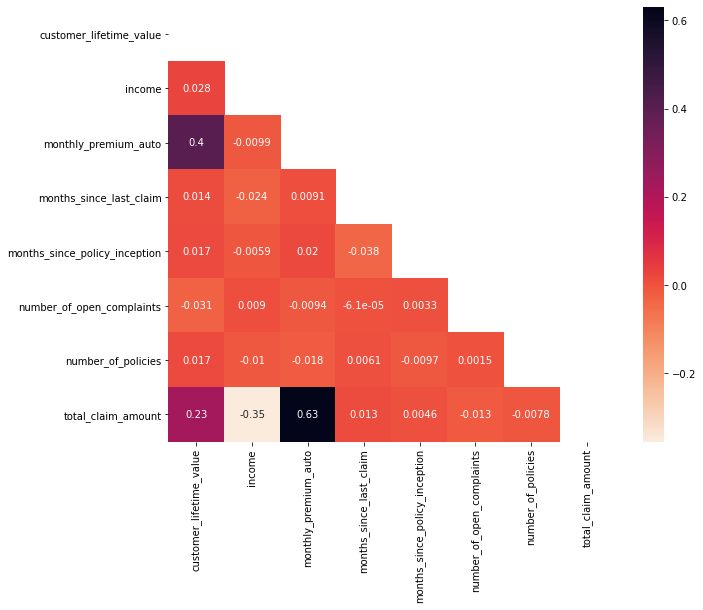

In [35]:
# correlation matrix plot
correlations = numerical.corr()
print(correlations)
cmap = sns.cm.rocket_r  ## for reversing the colors
mask=np.zeros_like(numerical.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(10, 8))
ax=sns.heatmap(numerical.corr(), mask=mask, annot=True,cmap=cmap)
plt.show()


- As we can see from the correlation coeffient matrix that none of the independent variables have a higher correlation of 0.63. Hence, we cannnot drop any of the variables.

## Transform Categorical Values
- Get cathegorical Columns

In [142]:
categoricals = df.select_dtypes(object)
categoricals.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type,month_effective_to_date
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,M,February
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,M,January
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A,February
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A,January
4,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,M,January


### Conduct One Hot Encoder data fitting on policy type

In [143]:
categoricals["policy_type"].value_counts()

Personal Auto     8016
Corporate Auto    2319
Special Auto       441
Name: policy_type, dtype: int64

In [144]:
from sklearn import preprocessing

In [145]:
enc = preprocessing.OneHotEncoder(handle_unknown="ignore")
X = [["Personal Auto", 1], ["Corporate Auto", 2], ["Special Auto", 3]]
enc.fit(X)

OneHotEncoder(handle_unknown='ignore')

In [146]:
input_data = pd.DataFrame ([["Personal Auto", 1], ["Corporate Auto", 2], ["Special Auto", 3]])

In [147]:
enc = preprocessing.OneHotEncoder(handle_unknown="ignore")
enc.fit_transform(input_data).toarray()

array([[0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1.]])

In [148]:
### work with two categorical variables.
enc = preprocessing.OneHotEncoder(handle_unknown="ignore")
categorical_hot_encoder = enc.fit_transform(np.array(categoricals.loc[:,["policy_type","marital_status"]])).toarray()

In [149]:
categorical_hot_encoder

array([[1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 1.]])

### Put the cathegorical clumns into numerical binary values

In [150]:
categorical_numerical =pd.get_dummies(categoricals)
categorical_numerical

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,...,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small,vehicle_type_A,vehicle_type_M,month_effective_to_date_February,month_effective_to_date_January
0,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
1,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1
2,0,0,0,0,1,1,0,1,0,0,...,1,0,0,0,1,0,1,0,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1
4,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10771,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,1,0,0,1
10772,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1
10773,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
10774,0,1,0,0,0,1,0,0,0,1,...,1,0,0,0,1,0,1,0,1,0


## Activity 6
### Processing Data

(Further processing...)

- Normalize (numerical). (done)
- One Hot/Label Encoding (categorical).
- Concat DataFrames
- We decided to concatinate the numerical_z_scaled df and the categorical df. We do this below and call it z_scaled_full_df

In [152]:
z_scaled_full_df = numerical_z_scaled.join(categoricals, lsuffix="_left")
z_scaled_full_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state,response,...,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type,month_effective_to_date
0,-0.465863,0.344937,-0.935817,-0.831982,0.138905,-0.407032,2.510476,-0.485411,Arizona,No,...,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,M,February
1,-0.840689,-1.235090,-0.848630,-1.240896,-0.792053,-0.407032,-0.825320,1.060563,California,No,...,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,M,January
2,1.006703,-0.506775,0.197617,1.928187,-0.613022,-0.407032,-0.408346,0.154692,Washington,No,...,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A,February
3,2.079247,0.379447,0.110430,-0.525296,-1.615592,-0.407032,-0.408346,0.168416,Oregon,Yes,...,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A,January
4,0.146456,-0.456245,0.691678,-0.014154,-0.613022,-0.407032,1.676527,0.934051,Oregon,No,...,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,M,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10771,1.096093,-1.235090,4.644164,-0.014154,-0.290768,-0.407032,1.676527,2.665866,Nevada,No,...,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A,January
10772,-0.400471,0.776452,-0.819567,-0.831982,0.711801,-0.407032,1.259553,-0.553049,Oregon,No,...,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A,January
10773,2.305951,0.075442,3.132919,-0.423068,0.532771,-0.407032,-0.408346,-0.182774,Arizona,No,...,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,M,February
10774,0.574472,0.876756,1.883236,-1.547581,-0.756247,4.093920,1.259553,0.627551,California,No,...,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A,February


## Linear Regression
- Train-test split.
- Apply linear regression.

In [153]:
# Train test set split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 100)
x_train

,monthly_premium_auto
8158,65
3353,110
9913,66
6215,132
10015,72
...,...
350,62
79,115
8039,84
6936,119


In [154]:
## Apply linear regression

lm = LinearRegression() 
model = lm.fit(x_train,y_train)
predictions = model.predict(x_test)
predictions

array([[536.96413634],
       [558.63205051],
       [304.03405909],
       ...,
       [379.87175866],
       [266.11520931],
       [293.20010201]])

In [155]:
## Calculating the robustness of the model (maybe R-squared)
model.score(x_test,y_test)

0.3550816780477314

In [156]:
## Isolating alpha and beta of the linear regression

print("The slope of the regression is: {:.5f}".format(float(model.coef_)))
print("The intercept of the regression is: {:.5f}".format(float(model.intercept_)))


The slope of the regression is: 5.41698
The intercept of the regression is: -69.73746


In [157]:
## Isolating alpha and beta of the linear regression

print(model.coef_)

print(model.intercept_)

[[5.41697854]]
[-69.73746022]


##Model Validation
Description:

- MSE.
- RMSE.
- MAE.
- R2.
1. MSE. (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.
2. RMSE. (Root Mean Squared Error) is the error rate by the square root of MSE.
3. MAE. (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
4. R2. (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

In [166]:
#MSE
mse = mean_squared_error(yy_test, predicted_yy)

mse

54881.69239038328

In [167]:
#RMSE

rmse = np.sqrt(mse)
rmse

234.26841953277287

In [170]:
# MAE -> NOT SURE IF That WORK

MAE = np.mean( np.abs(yy_test - predicted_yy))

MAE

total_claim_amount    158.046553
dtype: float64

In [171]:
# R2 = model.score()

from sklearn.metrics import r2_score

r2_score(yy_test, predicted_yy)

0.3550816780477314

In [41]:
numericals_features.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
count,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000
mean,8016.710885,37543.735152,93.200260,15.138456,48.120638,0.361730,2.979306
std,6885.053012,30397.579910,34.408721,9.782011,27.928243,0.888701,2.398228
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000
25%,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000
50%,5774.709107,33837.000000,83.000000,15.000000,48.000000,0.000000,2.000000
75%,8991.339269,62329.000000,109.000000,23.000000,71.000000,0.000000,4.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000


##Creating a Linear Model based on the template from Rafa
- Copied from section X-Y Split in the follwing Notebook:
https://github.com/raafat-hantoush/IH_RH_DA_FT_AUG_2021_Labs_Activities_Solutions/blob/main/Labs_Solutions/Pandas/Lab_Customer_Analysis_Case_Study.ipynb

- X-Y Splitting
- splitting the target variable "total_claim_amount" from the cleaned df called df.

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10776 entries, 0 to 10775
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          10163 non-null  object        
 1   customer_lifetime_value        10776 non-null  float64       
 2   response                       10163 non-null  object        
 3   coverage                       10776 non-null  object        
 4   education                      10776 non-null  object        
 5   effective_to_date              10776 non-null  datetime64[ns]
 6   employmentstatus               10776 non-null  object        
 7   gender                         10776 non-null  object        
 8   income                         10776 non-null  int64         
 9   location_code                  10776 non-null  object        
 10  marital_status                 10776 non-null  object        
 11  monthly_premium

In [174]:
X=df.drop('total_claim_amount', axis=1)
y=df.total_claim_amount

# we drop some useless columns
X=X.drop(columns=['month_effective_to_date'])

### Transform Numerical Values
-  Get Numerical Columns

In [175]:
numericals_features =X._get_numeric_data()
# numericals =data.select_dtypes(np.number)
numericals_features.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809.216960,48029,61,7.0,52,0.0,9
1,2228.525238,0,64,3.0,26,0.0,1
2,14947.917300,22139,100,34.0,31,0.0,2
3,22332.439460,49078,97,10.0,3,0.0,2
4,9025.067525,23675,117,15.0,31,0.0,7


In [176]:
# rounding up the customer_lifetime_value column
numericals_features["customer_lifetime_value"]=numericals_features["customer_lifetime_value"].round()

In [177]:
numericals_features.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809.0,48029,61,7.0,52,0.0,9
1,2229.0,0,64,3.0,26,0.0,1
2,14948.0,22139,100,34.0,31,0.0,2
3,22332.0,49078,97,10.0,3,0.0,2
4,9025.0,23675,117,15.0,31,0.0,7


In [178]:
numericals_features.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
count,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000
mean,8016.716685,37543.735152,93.200260,15.138456,48.120638,0.361730,2.979306
std,6885.053756,30397.579910,34.408721,9.782011,27.928243,0.888701,2.398228
min,1898.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000
25%,4014.000000,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000
50%,5775.000000,33837.000000,83.000000,15.000000,48.000000,0.000000,2.000000
75%,8991.250000,62329.000000,109.000000,23.000000,71.000000,0.000000,4.000000
max,83325.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000


### Get Categorical data

In [179]:
categoricals_features = X.select_dtypes(object)
categoricals_features.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,M
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,M
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,M


In [180]:
# get dummies pandas

categoricals_features=pd.get_dummies(categoricals, drop_first=True)

##pd.DataFrame(OneHotEncoder(drop='first').fit_transform(categoricals_features).toarray(),
## columns=OneHotEncoder(drop='first').fit(categoricals_features).get_feature_names(input_features=categoricals_features.columns)).head()

categoricals_features.head()

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,...,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,vehicle_type_M,month_effective_to_date_January
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,0,1,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,1


### Concatinating the Numerical and Categorical data

In [182]:
all_features=pd.concat([numericals_features, categoricals_features], axis=1) # concat numerical and categorical transformations
all_features.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,...,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,vehicle_type_M,month_effective_to_date_January
0,4809.0,48029,61,7.0,52,0.0,9,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,2229.0,0,64,3.0,26,0.0,1,1,0,0,...,0,0,0,0,0,0,1,0,1,1
2,14948.0,22139,100,34.0,31,0.0,2,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,22332.0,49078,97,10.0,3,0.0,2,0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,9025.0,23675,117,15.0,31,0.0,7,0,0,1,...,0,0,0,0,0,0,1,0,1,1


### Train Test Split (80% train & 20% test)

In [183]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(all_features, y, test_size=.20)

In [184]:
X_test

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,...,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,vehicle_type_M,month_effective_to_date_January
3192,5927.0,33561,152,6.0,30,0.0,1,1,0,0,...,0,0,0,0,1,0,1,0,1,1
7720,5907.0,47306,74,8.0,18,0.0,3,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1168,2960.0,69746,74,15.0,91,0.0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
145,3736.0,0,110,3.0,16,0.0,1,1,0,0,...,0,0,0,1,0,0,1,0,1,1
5421,4242.0,19834,64,26.0,8,4.0,8,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10086,5005.0,33566,63,25.0,56,1.0,4,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8700,4655.0,0,67,18.0,44,0.0,3,0,1,0,...,0,0,0,0,0,0,1,0,1,1
8212,58754.0,24964,185,0.0,84,0.0,2,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2729,7350.0,0,108,7.0,54,0.0,4,1,0,0,...,0,0,0,0,1,0,1,0,0,0


### Apply Linear Regression

In [185]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()    # model
model.fit(X_train.to_numpy(), y_train)   # model train
y_pred=model.predict(X_test.to_numpy())   # model prediction
y_pred_train=model.predict(X_train.to_numpy()) #train

In [186]:
# fit the model 
print("Model Intercept: ", model.intercept_)

print("Model Coefficient: ", model.coef_)


Model Intercept:  -371.0366183965274
Model Coefficient:  [ 2.18836086e-04 -2.40825054e-04  5.32888973e+00  4.58615363e-01
  8.18731987e-03 -3.11235176e+00  1.08599176e+00  1.01602418e+01
  1.14454629e+01  2.38270809e+00  9.44640637e+00 -2.48991721e+01
 -1.41926499e+01 -1.68554823e+01 -4.27792105e+00 -1.05650970e+01
  1.32217936e+01 -6.26842508e+00 -1.19924914e+01  4.81347921e+00
 -9.66052613e+00  6.51861349e+01  1.58357954e+01  3.78370158e+02
  2.24833534e+02 -5.33127908e+00  7.00963977e+01 -1.29684999e+00
  1.08621429e+01 -5.75867142e+00  1.76679470e+00  1.65834539e+00
 -1.10087250e+00 -1.85432288e+00  2.43330471e+01 -5.52739609e+00
 -7.94350806e+00  1.96971333e+01  7.02166214e+00  6.41765467e+00
  5.03515289e-03 -2.41784236e+00  1.74107451e+00  1.62185791e+01
 -2.63217298e+01 -2.20092765e+01 -3.44882841e+01  6.51548693e-01
 -2.75688566e+00  4.65335068e+00  1.62103833e-01 -2.57058551e+00]


In [187]:
model.score(X_test,y_test)

0.7645267791328851

Text(0.5, 1.0, 'Train Residual histogram')

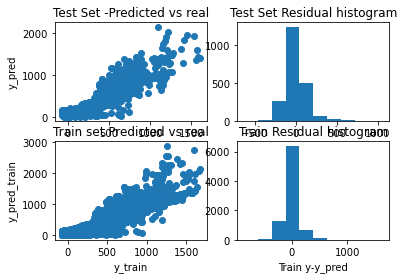

In [188]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(2,2)
ax[0,0].plot(y_pred, y_test, 'o')
ax[0,0].set_xlabel("y_test")
ax[0,0].set_ylabel("y_pred")
ax[0,0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[0,1].hist(y_test - y_pred)
ax[0,1].set_xlabel("Test y-y_pred")
ax[0,1].set_title("Test Set Residual histogram")

ax[1,0].plot(y_pred_train, y_train, 'o')
ax[1,0].set_xlabel("y_train")
ax[1,0].set_ylabel("y_pred_train")
ax[1,0].set_title("Train set Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1,1].hist(y_train - y_pred_train)
ax[1,1].set_xlabel("Train y-y_pred")
ax[1,1].set_title("Train Residual histogram")

## Model Validation

- Description:
- MSE:
- RMSE:
- MAE:
- R2:

In [190]:
# MSE
from sklearn.metrics import mean_squared_error as mse

train_mse=mse(model.predict(X_train.to_numpy()), y_train)

test_mse=mse(model.predict(X_test.to_numpy()), y_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))


train MSE: 19610.06351995205 -- test MSE: 19482.14084983958


In [193]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mse

19482.14084983958

In [192]:
# RMSE- Squaring MSE

print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 140.03593653042083 -- test RMSE: 139.57843977434186


In [195]:
# MAE
from sklearn.metrics import mean_absolute_error as mae
train_mae=mae(model.predict(X_train.to_numpy()), y_train)
test_mae=mae(model.predict(X_test.to_numpy()), y_test)

print ('train MAE: {} -- test MAE: {}'.format(train_mse, test_mse))

# Same result as for MSE

train MAE: 19610.06351995205 -- test MAE: 19482.14084983958


In [196]:
r2= model.score(X_test.to_numpy(), y_test)

In [197]:
print ('train R2: {} -- test R2: {}'.format(model.score(X_train.to_numpy(), y_train),
                                            model.score(X_test.to_numpy(), y_test)))

# Same result as for model.score above

train R2: 0.7725355241544724 -- test R2: 0.7645267791328851


In [199]:
# Adjusted R2

N=X_train.shape[0]
p=1
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.764499455714358


### Feature Importance

In [200]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [201]:
features_importances

,Attribute,Importance
0,customer_lifetime_value,0.000219
1,income,0.000219
28,policy_type_Special Auto,0.000219
29,policy_Corporate L2,0.000219
30,policy_Corporate L3,0.000219
31,policy_Personal L1,0.000219
32,policy_Personal L2,0.000219
33,policy_Personal L3,0.000219
34,policy_Special L1,0.000219
35,policy_Special L2,0.000219


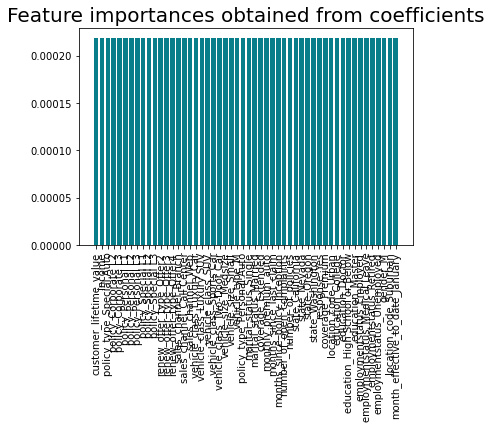

In [202]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()